In [741]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

#to display all rows columns 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [742]:
ipl_df = pd.read_csv('../cric_stats/IPL_ball_by_ball_updated.csv')

In [743]:
ipl_df.head(40)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,6.8,Royal Challengers Bangalore,Kolkata Knight Riders,MV Boucher,CL White,AB Agarkar,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,2.7,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Dinda,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.1,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.3,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.4,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,I Sharma,0,1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
6,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.5,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,3.6,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,I Sharma,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.1,Royal Challengers Bangalore,Kolkata Knight Riders,JH Kallis,W Jaffer,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,335982,2008,2008-04-18,M Chinnaswamy Stadium,2,4.2,Royal Challengers Bangalore,Kolkata Knight Riders,W Jaffer,JH Kallis,AB Agarkar,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [744]:
ipl_df.bowling_team.unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kings XI Punjab', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings'],
      dtype=object)

In [745]:
ipl_df[ipl_df.bowling_team == 'Mumbai Indians']['bowler'].unique()

array(['DS Kulkarni', 'Harbhajan Singh', 'A Nehra', 'AM Nayar',
       'ST Jayasuriya', 'SM Pollock', 'MA Khote', 'DJ Bravo',
       'VS Yeligati', 'SD Chitnis', 'CRD Fernando', 'DJ Thornely',
       'RR Raje', 'DR Smith', 'A Nel', 'SL Malinga', 'Z Khan',
       'SR Tendulkar', 'JP Duminy', 'GR Napier', 'C Nanda', 'AM Rahane',
       'RA Shaikh', 'R McLaren', 'R Sathish', 'AG Murtaza', 'KA Pollard',
       'AN Ahmed', 'STR Binny', 'JEC Franklin', 'MM Patel', 'RG Sharma',
       'A Symonds', 'TL Suman', 'RW Price', 'PP Ojha', 'RP Singh',
       'CJ McKay', 'NLTC Perera', 'RJ Peterson', 'R Shukla', 'JJ Bumrah',
       'MG Johnson', 'JDP Oram', 'R Dhawan', 'YS Chahal', 'P Suyal',
       'GJ Maxwell', 'NM Coulter-Nile', 'CJ Anderson', 'P Kumar',
       'LMP Simmons', 'S Gopal', 'K Santokie', 'M de Lange',
       'R Vinay Kumar', 'J Suchith', 'MJ McClenaghan', 'HH Pandya',
       'TG Southee', 'KH Pandya', 'N Rana', 'KV Sharma', 'M Markande',
       'Mustafizur Rahman', 'PJ Sangwan', 'BCJ C

In [746]:
ipl_df[ipl_df.batting_team == 'Royal Challengers Bangalore']['striker'].unique()

array(['MV Boucher', 'W Jaffer', 'JH Kallis', 'CL White', 'V Kohli',
       'R Dravid', 'P Kumar', 'Z Khan', 'SB Joshi', 'AA Noffke',
       'B Akhil', 'LRPL Taylor', 'S Chanderpaul', 'R Vinay Kumar',
       'B Chipli', 'DW Steyn', 'Misbah-ul-Haq', 'DT Patil', 'A Kumble',
       'J Arunkumar', 'Abdur Razzak', 'SP Goswami', 'KP Pietersen',
       'RV Uthappa', 'JD Ryder', 'R Bishnoi', 'KV Sharma', 'Pankaj Singh',
       'MK Pandey', 'RE van der Merwe', 'KP Appanna', 'D du Preez',
       'EJG Morgan', 'A Mithun', 'S Sriram', 'AUK Pathan',
       'AB de Villiers', 'TM Dilshan', 'SS Tiwary', 'MA Agarwal',
       'DL Vettori', 'CA Pujara', 'JJ van der Wath', 'R Ninan',
       'S Aravind', 'CH Gayle', 'J Syed Mohammad', 'M Kaif',
       'LA Pomersbach', 'KB Arun Karthik', 'CK Langeveldt', 'AB McDonald',
       'HV Patel', 'RR Bhatkal', 'M Muralitharan', 'P Parameswaran',
       'KK Nair', 'DT Christian', 'MC Henriques', 'M Kartik',
       'JD Unadkat', 'R Rampaul', 'KL Rahul', 'A Mukund', 'Y

In [747]:
striker = 'AB de Villiers'
bowler = 'JJ Bumrah'

In [748]:
vs_df = ipl_df[(ipl_df.striker == striker ) & (ipl_df.bowler == bowler)]

In [749]:
vs_df.head()


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
95691,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95692,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.2,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95695,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,6.4,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95928,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.6,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95942,729287,2014,2014-04-19,Dubai International Cricket Stadium,2,11.1,Royal Challengers Bangalore,Mumbai Indians,AB de Villiers,PA Patel,JJ Bumrah,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [750]:
vs_df['runs_off_bat'] = vs_df['runs_off_bat'].astype('int')

In [751]:
#runs_scored
runs = sum(vs_df['runs_off_bat'])
runs

131

In [752]:
#balls_faced
balls = len(vs_df) - sum(vs_df['extras'])
balls

86

In [753]:
#strikersSR
sr = runs/balls *100
sr

152.32558139534885

In [754]:
#dismmised
outs = len(vs_df[vs_df.player_dismissed == 'AB de Villiers'])
outs

3

In [755]:
#bowlersSR
balls/outs

28.666666666666668

In [756]:
bumrah_df = ipl_df[ipl_df.bowler =='JJ Bumrah']

In [757]:
#stats of all strikers against bumrah
bdf1 = pd.DataFrame(bumrah_df.groupby('striker')['runs_off_bat'].sum().reset_index())
bdf2 = pd.DataFrame(bumrah_df.groupby('striker')['ball'].count().reset_index())


In [758]:
bdf_f = bdf1.merge(bdf2, on = 'striker', how = 'left')

In [759]:
bdf_f['strike_rate'] = 100*bdf_f['runs_off_bat']/bdf_f['ball']

In [760]:
bdf_f = bdf_f[(bdf_f.ball >= 25) & (bdf_f.strike_rate >= 130)]
bdf_f.rename(columns={'runs_off_bat':'runs_scored'},inplace=True)
bdf_f.head()

,striker,runs_scored,ball,strike_rate
1,AB de Villiers,131,90,145.555556
12,AT Rayudu,48,34,141.176471
17,BB McCullum,40,27,148.148148
49,F du Plessis,58,34,170.588235
68,JP Duminy,70,33,212.121212


In [761]:
abd_df = ipl_df[ipl_df.striker =='AB de Villiers']

In [762]:
# runs scored by ab against all bowlers
adf1 = pd.DataFrame(abd_df.groupby('bowler')['runs_off_bat'].sum().reset_index())
adf2 = pd.DataFrame(abd_df.groupby('bowler')['ball'].count().reset_index())


In [763]:
adf_f = adf1.merge(adf2, on='bowler',how='left')

In [764]:
adf_f['strike_rate'] = 100*adf_f['runs_off_bat']/adf_f['ball']

In [765]:
adf_f = adf_f[(adf_f.ball >= 25) & (adf_f.strike_rate >= 130)]

In [766]:
adf_f.rename(columns={'runs_off_bat':'runs_scored'},inplace=True)

adf_f.head()


,bowler,runs_scored,ball,strike_rate
5,A Nehra,61,29,210.344828
16,AD Russell,87,39,223.076923
32,B Kumar,68,43,158.139535
40,CH Morris,71,35,202.857143
48,DJ Bravo,72,47,153.191489


In [767]:
bdf_f.reset_index(inplace = True, drop = True)
adf_f.reset_index(inplace = True, drop = True)

In [768]:
bdf_f

,striker,runs_scored,ball,strike_rate
0,AB de Villiers,131,90,145.555556
1,AT Rayudu,48,34,141.176471
2,BB McCullum,40,27,148.148148
3,F du Plessis,58,34,170.588235
4,JP Duminy,70,33,212.121212
5,KD Karthik,54,33,163.636364
6,MK Pandey,62,34,182.352941
7,RV Uthappa,52,36,144.444444
8,SS Iyer,59,40,147.500000
9,V Kohli,131,87,150.574713


In [769]:
adf_f.head()

,bowler,runs_scored,ball,strike_rate
0,A Nehra,61,29,210.344828
1,AD Russell,87,39,223.076923
2,B Kumar,68,43,158.139535
3,CH Morris,71,35,202.857143
4,DJ Bravo,72,47,153.191489


VISUALIZATION

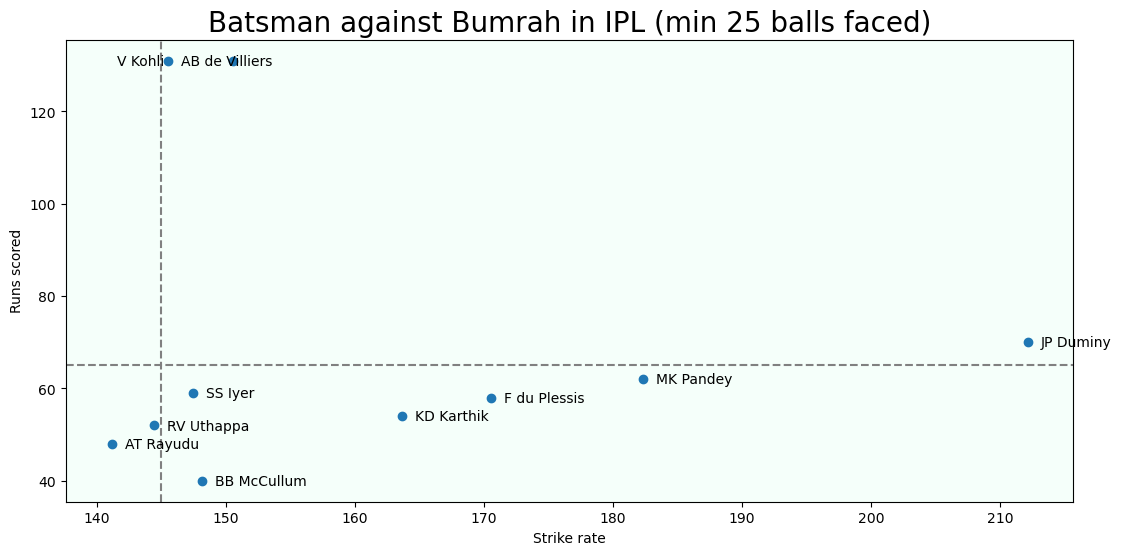

In [770]:
plt.figure(figsize = (13,6))
plt.rcParams['axes.facecolor'] = '#F5FFFA'
plt.scatter(bdf_f.strike_rate, bdf_f.runs_scored)

for i in range(len(bdf_f)):
        if bdf_f.striker[i] == 'V Kohli':
                plt.text(bdf_f.strike_rate[i] - 9, bdf_f.runs_scored[i] - 1, bdf_f.striker[i])      
        else:
                plt.text(bdf_f['strike_rate'][i] + 1, bdf_f['runs_scored'][i] - 1, bdf_f['striker'][i])

plt.axvline(145, ls = '--', color = 'grey')
plt.axhline(65, ls = '--', color = 'grey')
plt.title('Batsman against Bumrah in IPL (min 25 balls faced)', fontsize = 20)
plt.xlabel('Strike rate')
plt.ylabel('Runs scored')
plt.show()

In [795]:
def setColour(val):
    return  'red'  if val =='AB de Villiers' else 'blue'

In [805]:
import plotly.graph_objs as go
colour = list(map(setColour, bdf_f.striker))
colour = list(map(setColour, bdf_f.striker))
fig = go.Figure(data = go.Scatter(x=bdf_f['strike_rate'], y=bdf_f["runs_scored"],mode='markers',marker_color = colour,text= bdf_f['striker'],))

fig.update_traces(textposition='top center',)

fig.update_layout(
    height=500,
    title_text='Bumrah vs Other Batsmans(min 25 balls faced)'
)
fig.show()

In [785]:
import plotly.express as px
fig = px.scatter(adf_f, x="strike_rate", y="runs_scored",text='bowler')
fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='ABD vs Other Bowlers(min 25 balls faced)'
)
# create a figure

fig.show()